# Task 2 : Prediction Using Unsupervised Learning

# Sparks Foundation March2022 Batch

In [23]:
import numpy as np  
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn import datasets

In [29]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [30]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [31]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
from sklearn.cluster import KMeans

In [37]:
#finding the optimum numbers of kmeans-clusters
x=iris_df.iloc[:,[0,1,2,3]].values
arr=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)

C:\Users\verno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

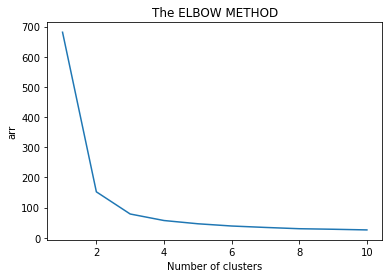

In [38]:
#plotting the results using pyplot library
plt.plot(range(1,11),arr)
plt.title("The ELBOW METHOD")
plt.xlabel("Number of clusters")
plt.ylabel("arr")
plt.show

As we can show in the above graph, the optimum clusters where the elbow occurs. We can concluded with we can take the number clusters as '3'.

In [40]:
kmeans=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

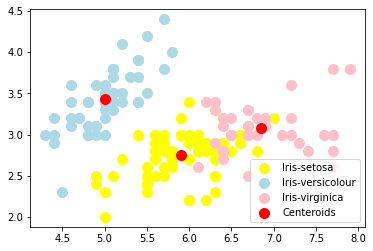

In [54]:
#visualizing the clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=100,c='yellow', label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=100,c='lightblue', label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=100,c='pink', label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red', label="Centeroids")
plt.legend()